In [1]:
 # Cell 1: Import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
 accuracy_score, precision_score, recall_score, f1_score, 
roc_auc_score, confusion_matrix, classification_report
 )
from imblearn.over_sampling import SMOTE
import os
import warnings
warnings.filterwarnings('ignore')
print("="*80)
print("STEP 3: SMOTE BALANCING IMPLEMENTATION")
print("="*80)

STEP 3: SMOTE BALANCING IMPLEMENTATION


In [2]:
 # Cell 2: Load data from Step 1
X_train_scaled = np.load('../data/processed/X_train_scaled.npy')
X_test_scaled = np.load('../data/processed/X_test_scaled.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')
print(f"Original training data shape: {X_train_scaled.shape}")
print(f"Original class distribution: {np.bincount(y_train)}")
print(f"  Malignant (0): {np.sum(y_train == 0)} samples")
print(f"  Benign (1): {np.sum(y_train == 1)} samples")
print(f"  Imbalance ratio: {np.sum(y_train == 1) / np.sum(y_train == 0):.2f}:1")

Original training data shape: (455, 30)
Original class distribution: [170 285]
  Malignant (0): 170 samples
  Benign (1): 285 samples
  Imbalance ratio: 1.68:1


In [3]:
# Cell 3: Apply SMOTE balancing
print("\n" + "="*60)
print("APPLYING SMOTE")
print("="*60)
# Initialize SMOTE with k_neighbors=5 (default)
smote = SMOTE(random_state=42, k_neighbors=5)
# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"\n✅ SMOTE applied successfully!")
print(f"\nBalanced training data shape: {X_train_smote.shape}")
print(f"Balanced class distribution: {np.bincount(y_train_smote)}")
print(f"  Malignant (0): {np.sum(y_train_smote == 0)} samples")
print(f"  Benign (1): {np.sum(y_train_smote == 1)} samples")
print(f"  New balance ratio: {np.sum(y_train_smote == 1) / np.sum(y_train_smote == 0):.2f}:1")
# Calculate oversampling statistics
original_minority = np.sum(y_train == 0)
new_minority = np.sum(y_train_smote == 0)
synthetic_samples = new_minority - original_minority
print(f"\n SMOTE Statistics:")
print(f"Original minority samples: {original_minority}")
print(f"New minority samples: {new_minority}")
print(f"   Synthetic samples created: {synthetic_samples}")
print(f"   Total training samples: {len(y_train_smote)} (was {len(y_train)})")


APPLYING SMOTE

✅ SMOTE applied successfully!

Balanced training data shape: (570, 30)
Balanced class distribution: [285 285]
  Malignant (0): 285 samples
  Benign (1): 285 samples
  New balance ratio: 1.00:1

 SMOTE Statistics:
Original minority samples: 170
New minority samples: 285
   Synthetic samples created: 115
   Total training samples: 570 (was 455)


In [4]:
 # Cell 4: Define evaluation function (reuse from Step 2)
def evaluate_model_with_balancing(model, X_train, y_train, X_test, y_test, 
                                 model_name, method_name):
    """
    Comprehensive model evaluation for balanced data.
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Method': method_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1_Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
        
        # Class-specific metrics (CRITICAL for imbalanced data)
        'Precision_Malignant': precision_score(y_test, y_pred, pos_label=0),
        'Recall_Malignant': recall_score(y_test, y_pred, pos_label=0),
        'F1_Malignant': f1_score(y_test, y_pred, pos_label=0),
        'Precision_Benign': precision_score(y_test, y_pred, pos_label=1),
        'Recall_Benign': recall_score(y_test, y_pred, pos_label=1),
        'F1_Benign': f1_score(y_test, y_pred, pos_label=1),
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"Model: {model_name} | Method: {method_name}")
    print(f"{'='*60}")
    print(f"Overall: Acc={metrics['Accuracy']:.4f}, "
          f"F1={metrics['F1_Score']:.4f}, AUC={metrics['ROC_AUC']:.4f}")
    print(f"Malignant: P={metrics['Precision_Malignant']:.4f}, "
          f"R={metrics['Recall_Malignant']:.4f}, F1={metrics['F1_Malignant']:.4f}")
    print(f"Benign: P={metrics['Precision_Benign']:.4f}, "
          f"R={metrics['Recall_Benign']:.4f}, F1={metrics['F1_Benign']:.4f}")
    
    return metrics, y_pred, y_pred_proba


In [14]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

smote_results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    metrics, y_pred, y_pred_proba = evaluate_model_with_balancing(
        model, X_train_smote, y_train_smote, X_test_scaled, y_test, 
        name, "SMOTE"
    )
    smote_results.append(metrics)

smote_results_df = pd.DataFrame(smote_results)
smote_results_df.to_csv('../results/smote_results.csv', index=False)



Training Logistic Regression...

Model: Logistic Regression | Method: SMOTE
Overall: Acc=0.9649, F1=0.9651, AUC=0.9954
Malignant: P=0.9318, R=0.9762, F1=0.9535
Benign: P=0.9857, R=0.9583, F1=0.9718

Training Decision Tree...

Model: Decision Tree | Method: SMOTE
Overall: Acc=0.9386, F1=0.9387, AUC=0.9365
Malignant: P=0.9070, R=0.9286, F1=0.9176
Benign: P=0.9577, R=0.9444, F1=0.9510

Training Random Forest...

Model: Random Forest | Method: SMOTE
Overall: Acc=0.9474, F1=0.9478, AUC=0.9937
Malignant: P=0.8913, R=0.9762, F1=0.9318
Benign: P=0.9853, R=0.9306, F1=0.9571


In [15]:
# Cell 6: Load baseline results and compare
baseline_results = pd.read_csv('../results/baseline_results.csv')

print("\n" + "="*80)
print("SMOTE vs BASELINE COMPARISON")
print("="*80)

comparison_metrics = ['Accuracy', 'F1_Score', 'ROC_AUC', 
                      'Recall_Malignant', 'F1_Malignant']

# Mapping for baseline column names if they differ
malignant_metric_map = {
    'Recall_Malignant': 'Recall_Class_0',
    'F1_Malignant': 'F1_Class_0'
}

for metric in comparison_metrics:
    print(f"\n{metric}:")
    print("  " + "-"*70)
    
    for model_name in models.keys():
        # Choose correct column name
        baseline_col = malignant_metric_map.get(metric, metric)
        
        # Extract baseline and SMOTE metric values
        baseline_val = baseline_results[
            baseline_results['Model'] == model_name
        ][baseline_col].values[0]
        
        smote_val = smote_results_df[
            smote_results_df['Model'] == model_name
        ][metric].values[0]
        
        # Calculate improvement
        improvement = smote_val - baseline_val
        symbol = "✅" if improvement > 0 else "⚠️"
        
        print(f"  {model_name:20} | Baseline: {baseline_val:.4f} | "
              f"SMOTE: {smote_val:.4f} | Δ: {improvement:+.4f} {symbol}")



SMOTE vs BASELINE COMPARISON

Accuracy:
  ----------------------------------------------------------------------
  Logistic Regression  | Baseline: 0.9825 | SMOTE: 0.9649 | Δ: -0.0175 ⚠️
  Decision Tree        | Baseline: 0.9035 | SMOTE: 0.9386 | Δ: +0.0351 ✅
  Random Forest        | Baseline: 0.9474 | SMOTE: 0.9474 | Δ: -0.0000 ⚠️

F1_Score:
  ----------------------------------------------------------------------
  Logistic Regression  | Baseline: 0.9825 | SMOTE: 0.9651 | Δ: -0.0174 ⚠️
  Decision Tree        | Baseline: 0.9045 | SMOTE: 0.9387 | Δ: +0.0343 ✅
  Random Forest        | Baseline: 0.9474 | SMOTE: 0.9478 | Δ: +0.0004 ✅

ROC_AUC:
  ----------------------------------------------------------------------
  Logistic Regression  | Baseline: 0.9954 | SMOTE: 0.9954 | Δ: +0.0000 ⚠️
  Decision Tree        | Baseline: 0.9216 | SMOTE: 0.9365 | Δ: +0.0149 ✅
  Random Forest        | Baseline: 0.9947 | SMOTE: 0.9937 | Δ: -0.0010 ⚠️

Recall_Malignant:
  ------------------------------------

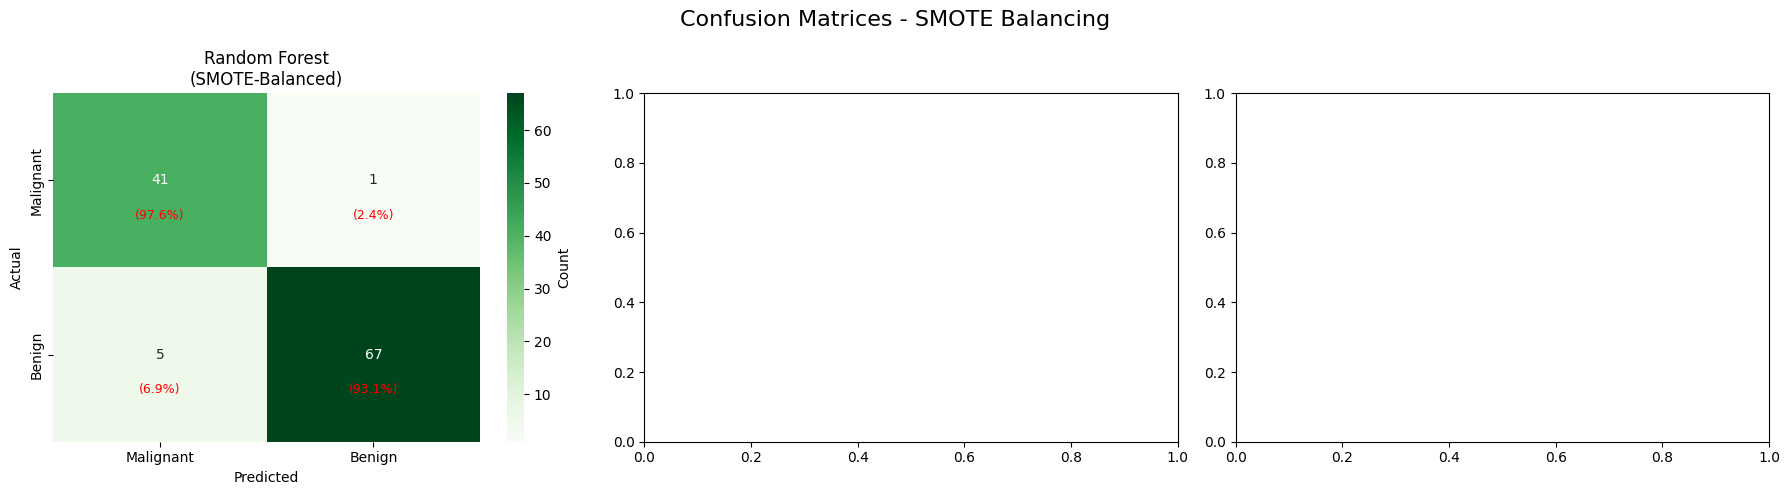

In [16]:
 # Cell 7: Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
class_names = ['Malignant', 'Benign']
for i, (name, y_pred) in enumerate(smote_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i],
                xticklabels=class_names, yticklabels=class_names,
                cmap='Greens', cbar_kws={'label': 'Count'})
    
    axes[i].set_title(f'{name}\n(SMOTE-Balanced)')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    
    # Add percentages
    for j in range(2):
        for k in range(2):
            axes[i].text(k+0.5, j+0.7, f'({cm_normalized[j,k]:.1f}%)',
                        ha='center', va='center', fontsize=9, color='red')
plt.suptitle('Confusion Matrices - SMOTE Balancing', fontsize=16)
plt.tight_layout()
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/smote_confusion_matrices.png', 
                        dpi=300, bbox_inches='tight')
plt.show()

Skipping Recall_Malignant: column not found in one of the DataFrames
Skipping F1_Malignant: column not found in one of the DataFrames


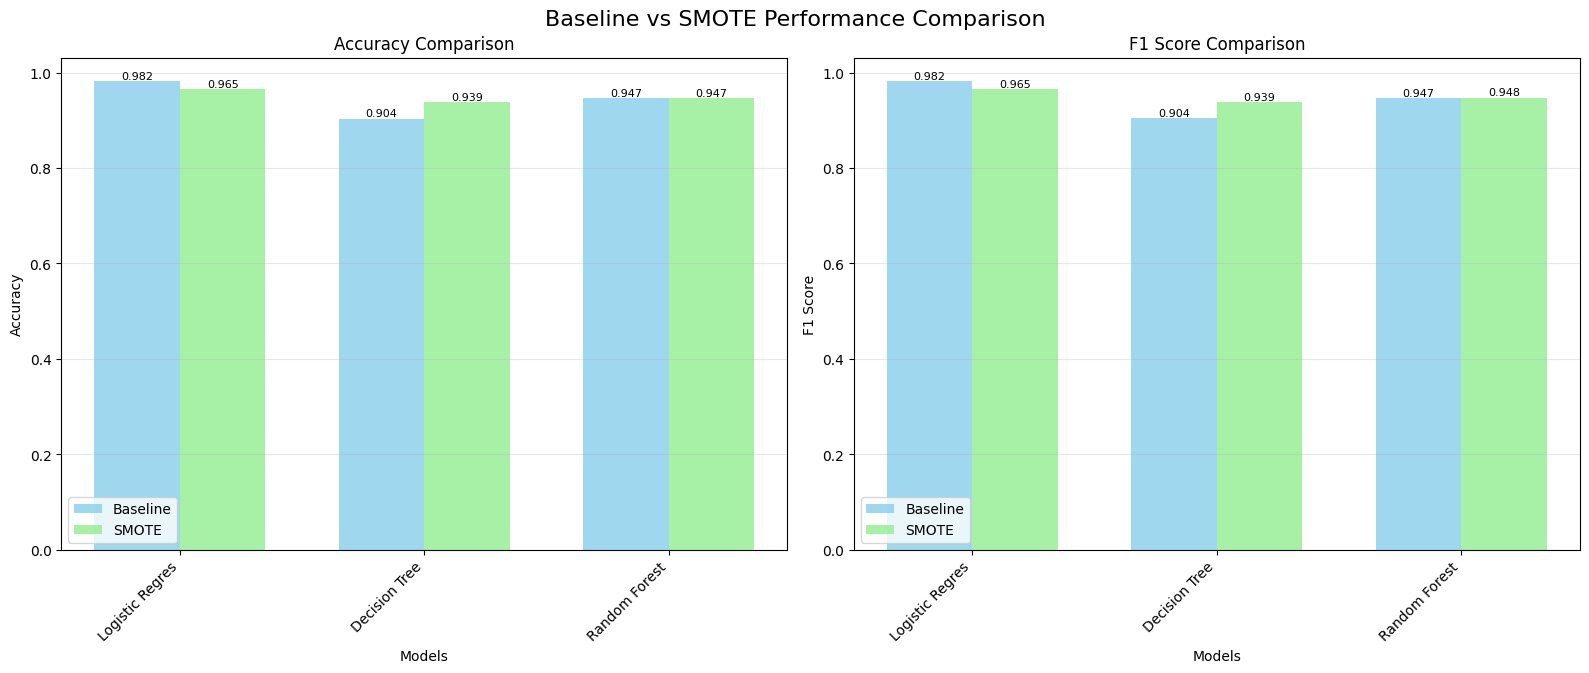

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define the metrics to plot
metrics_to_plot = [
    ('Accuracy', 'Accuracy'),
    ('F1_Score', 'F1 Score'),
    ('Recall_Malignant', 'Malignant Recall'),
    ('F1_Malignant', 'Malignant F1 Score')
]

model_names = list(models.keys())

for idx, (metric, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    # Check if the metric exists in both DataFrames
    baseline_exists = metric in baseline_results.columns
    smote_exists = metric in smote_results_df.columns
    
    if not (baseline_exists and smote_exists):
        ax.set_visible(False)  # hide subplot if metric not available
        print(f"Skipping {metric}: column not found in one of the DataFrames")
        continue

    baseline_vals = []
    smote_vals = []
    
    for model_name in model_names:
        # Safely get values
        baseline_val = baseline_results.loc[baseline_results['Model'] == model_name, metric].values[0]
        smote_val = smote_results_df.loc[smote_results_df['Model'] == model_name, metric].values[0]
        
        baseline_vals.append(baseline_val)
        smote_vals.append(smote_val)
    
    # Plot bars
    x = np.arange(len(model_names))
    width = 0.35
    bars1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline', color='skyblue', alpha=0.8)
    bars2 = ax.bar(x + width/2, smote_vals, width, label='SMOTE', color='lightgreen', alpha=0.8)
    
    ax.set_xlabel('Models')
    ax.set_ylabel(title)
    ax.set_title(f'{title} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels([name[:15] for name in model_names], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Baseline vs SMOTE Performance Comparison', fontsize=16)
plt.tight_layout()
plt.savefig('../reports/figures/smote_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [22]:
# Cell 9: Save SMOTE results
os.makedirs('../results', exist_ok=True)
smote_results_df.to_csv('../results/smote_results.csv', index=False)
print("\n✅ Step 3 (SMOTE) completed successfully!")
print("\n Generated Files:")
print("   - ../results/smote_results.csv")
print("   - ../reports/figures/smote_performance_comparison.png")  
print(f"   - ../reports/figures/smote_confusion_matrices.png")
print("\n Key Findings:")
best_model = smote_results_df.loc[smote_results_df['F1_Malignant'].idxmax()]
print(f"   Best model: {best_model['Model']}") 
print(f"Malignant F1-Score: {best_model['F1_Malignant']:.4f}")
print(f" Malignant Recall: {best_model['Recall_Malignant']:.4f}")


✅ Step 3 (SMOTE) completed successfully!

 Generated Files:
   - ../results/smote_results.csv
   - ../reports/figures/smote_performance_comparison.png
   - ../reports/figures/smote_confusion_matrices.png

 Key Findings:
   Best model: Logistic Regression
Malignant F1-Score: 0.9535
 Malignant Recall: 0.9762
